# Landmark Classifier

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo’s location can often be obtained by looking at the photo’s metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo’s metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernible landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

This notebook classifies 50 landmarks by building models to automatically predict the location of the image based on any landmarks depicted in the image.

### Table of Content

In [5]:
# import all the packages
import re
import PIL.Image

import torch
import torchvision.models as models

from utils.models.models import train, predict_image
from utils.preprocess import preprocess
from utils.visualize import visualize

import warnings
warnings.filterwarnings('ignore')

						Classes & Indexes
0:	Haleakala National Park
1:	Mount Rainier National Park
2:	Ljubljana Castle


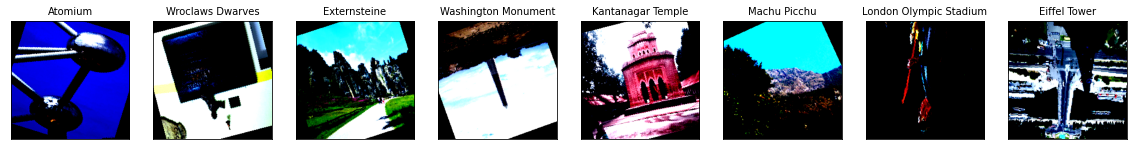

In [2]:
# define the batch size
BATCH_SIZE = 8

# get the loaders
loaders, dictionary = preprocess.pytorch_loaders(n_batch=BATCH_SIZE)

# show first three instances
dictionary.simple_print(3)

# visualize a batch
visualize.visualize(dictionary, loaders['train'], single=False)

# PyTorch

## How to train a model

There are three models available: vgg16, resnet18, and resnet34 which can be easily used. There's an option to select the optimizer (SGD, Adam, Adagrad) that take advantage of Nesterov (SGD), Momentum (SGD), and Amsgrad (Adam). Each model also implements the ExponentialLR schedulers.

Validation loss decreased (inf --> 3.949318).  Saving model ...
Validation loss decreased (3.949318 --> 3.643231).  Saving model ...
Validation loss decreased (3.643231 --> 3.563194).  Saving model ...


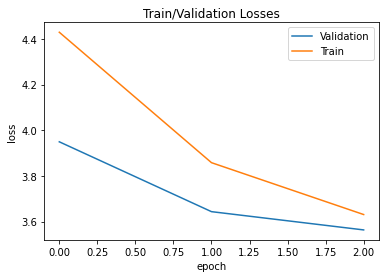

Test Loss: 3.536608


Test accuracy:  9% (120/1250)
========== Ending Training ==========
        Train loss: 3.63057668096907
        Valid loss: 3.5631941871643065
        Test  loss: 3.536608092392547
        


In [3]:
# get cuda availability
cuda = torch.cuda.is_available()

# train model
train(path='data', model_name='resnet34', mode='pytorch', epochs=3, save_name='test')

## Classify a single image

There are 12 images you can select from. All of them are stored in "images" folder. For convenience, copy one of the following:
##### Haleakala National Park
- 'images/00.Haleakala_National_Park/4afe43071f86a516.jpg'
- 'images/00.Haleakala_National_Park/075f8953165e9f08.jpg'
- 'images/00.Haleakala_National_Park/1346daf97c85522d.jpg'

##### Niagara Falls
- 'images/06.Niagara_Falls/2bf44601a8a364cb.jpg' <br>
- 'images/06.Niagara_Falls/3aa4d40bfc2f93f9.jpg' <br>
- 'images/06.Niagara_Falls/4b83cb0361a0112e.jpg' <br>

##### Vienna City Hall
- 'images/19.Vienna_City_Hall/2bf44601a8a364cb.jpg' <br>
- 'images/19.Vienna_City_Hall/3aa4d40bfc2f93f9.jpg' <br>
- 'images/19.Vienna_City_Hall/4b83cb0361a0112e.jpg' <br>

##### Brooklyn Bridge
- 'images/30.Brooklyn_Bridge/4bdf22a38ccc66c0.jpg' <br>
- 'images/30.Brooklyn_Bridge/11a81fe38b0333ca.jpg' <br>
- 'images/30.Brooklyn_Bridge/26421bec5cb3e3bf.jpg' <br>

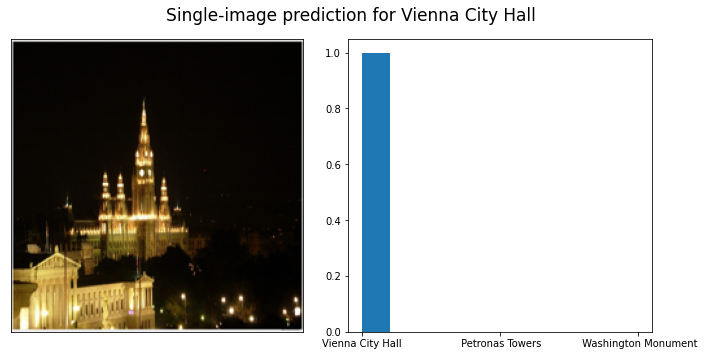

In [6]:
path = 'images/19.Vienna_City_Hall/33fdae363340e364.jpg'

# open image
img = PIL.Image.open(path)

# get cleaned title
title = path.split('/')[1].replace('_', ' ')
title = ' '.join(re.findall('[A-Za-z]+', title))

# predict image
predict_image(img, title, model_name='resnet34')

## FastAI